# Zero-Shot Classification Evaluation

This notebook evaluates the results of the zero-shot classification model. It calculates accuracy, generates a classification report, and visualizes the confusion matrix and confidence distributions.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Load Data

In [9]:
csv_path = 'Results/25proResultsCutOff.csv'
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows.")
df.head()

Loaded 1452 rows.


,LensID,Title,true_category,predicted_one,confidence_one,predicted_two,confidence_two
0,069-650-255-660-210,METALLIC YARN,Metal Textiles,Metal Textiles,0.95,Synthetic Textiles,0.04
1,079-371-609-369-49X,GLOVE AND GLOVE MANUFACTURING METHOD USING TUN...,Metal Textiles,Metal Textiles,0.90,Synthetic Textiles,0.08
2,069-690-063-792-127,MESH STRUCTURE AND METHOD FOR MANUFACTURING SA...,Metal Textiles,Metal Textiles,0.99,Mineral Textiles,0.01
3,072-233-647-840-326,"Conductive fabric,method of manufacturing a co...",Metal Textiles,Metal Textiles,0.90,Synthetic Textiles,0.05
4,073-506-111-387-532,A METHOD OF MAKING A SYNTHETIC RESIN STRUCTURE,Metal Textiles,Metal Textiles,0.95,Synthetic Textiles,0.03


## 2. Preprocessing

In [10]:
# Check for missing values
print("Missing values before cleanup:")
print(df[['true_category', 'predicted_one']].isnull().sum())

# Remove ERROR predictions
df = df[df['predicted_one'] != 'ERROR']

df = df.dropna(subset=['true_category', 'predicted_one'])
print(f"\nRows after cleanup: {len(df)}")

Missing values before cleanup:
true_category    0
predicted_one    0
dtype: int64

Rows after cleanup: 875


## 3. Metrics

In [11]:
y_true = df['true_category']
y_pred = df['predicted_one']

acc = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=0))

Overall Accuracy: 73.03%

Classification Report:
                    precision    recall  f1-score   support

    Metal Textiles       0.95      0.85      0.90       200
  Mineral Textiles       0.92      0.88      0.90       153
  Natural Textiles       0.97      0.54      0.69       319
             Other       0.00      0.00      0.00         0
Synthetic Textiles       0.69      0.81      0.74       203

          accuracy                           0.73       875
         macro avg       0.71      0.61      0.65       875
      weighted avg       0.89      0.73      0.79       875



## 4. Confusion Matrix

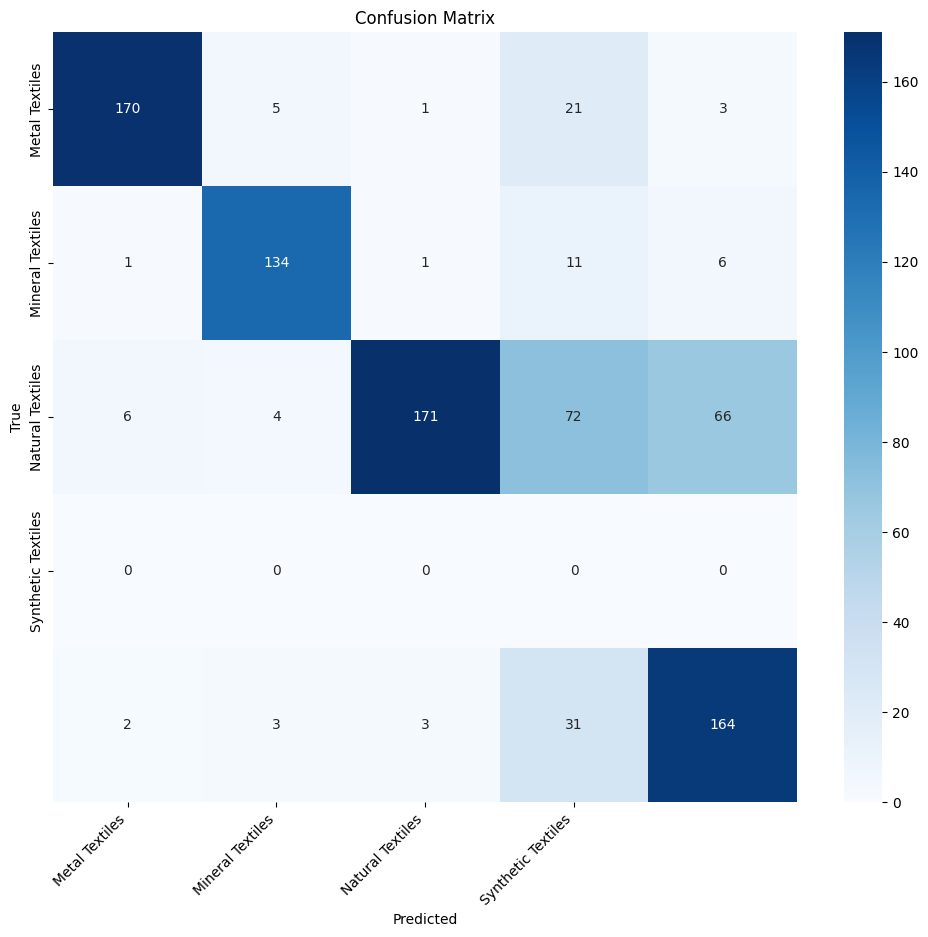

In [12]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
labels = sorted(y_true.unique())

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Confidence Analysis

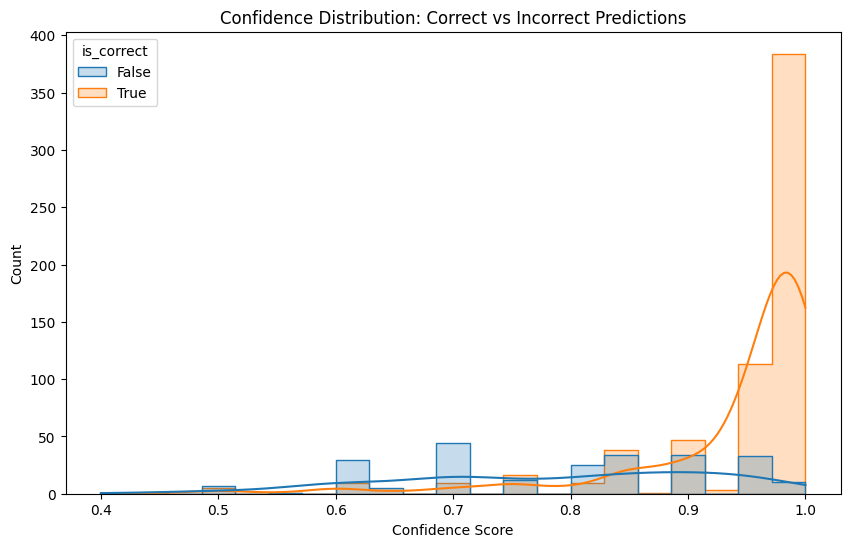

Average Confidence:
is_correct
False    0.788347
True     0.941315
Name: confidence_one, dtype: float64


In [13]:
df['is_correct'] = df['true_category'] == df['predicted_one']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='confidence_one', hue='is_correct', element='step', common_norm=False, kde=True)
plt.title('Confidence Distribution: Correct vs Incorrect Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.show()

print("Average Confidence:")
print(df.groupby('is_correct')['confidence_one'].mean())

## 6. Error Analysis: High Confidence Errors

In [14]:
errors = df[~df['is_correct']].sort_values(by='confidence_one', ascending=False)
print("Top 10 High Confidence Errors:")
errors[['Title', 'true_category', 'predicted_one', 'confidence_one']].head(10)

Top 10 High Confidence Errors:


,Title,true_category,predicted_one,confidence_one
465,Preparation method of rabbit manure forage,Natural Textiles,Other,1.00
64,CATALYSTS AND GETTER SYSTEMS,Metal Textiles,Other,0.99
489,METHOD FOR MANUFACTURING BEADS CONTAINING EXOG...,Natural Textiles,Other,0.99
723,ELEVATOR CAR ISOLATION SYSTEM AND METHOD,Synthetic Textiles,Other,0.99
285,Non-static acetate fiber textile line with uni...,Natural Textiles,Synthetic Textiles,0.98
164,Textile coating formulations comprising crossl...,Metal Textiles,Other,0.98
282,Acid modified polyvinyl acetate textile sizes,Natural Textiles,Synthetic Textiles,0.98
740,"Apparatus, system and method for preparing car...",Mineral Textiles,Synthetic Textiles,0.98
515,"MARKED CELLULOSE ACETATE FIBRES, MANUFACTURING...",Natural Textiles,Synthetic Textiles,0.98
259,Polyamide fibre rayon bamboo joint latitude bu...,Natural Textiles,Synthetic Textiles,0.98
